In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("cars24-car-price-cleaned.csv")

In [ ]:
df.info() #this used to tell the structure of the dataframe that is how many total columns are there, and nature of that

In [11]:
y = df["selling_price"]

In [ ]:
#nunique command will give the unique values in present particular column

In [15]:
df["make"].nunique()

41

In [19]:
df["model"].nunique()

3233

In [ ]:
# value_counts() it will return the total value associated with the unique value

In [32]:
df["model"].value_counts()

model
SWIFT DZIRE VDI              288
ALTO 800 LXI                 189
WAGON R VXI                  164
SWIFT VDI                    150
SWIFT DZIRE VXI              136
                            ... 
XUV300 W6 DIESEL               1
NANO STD BS IV                 1
FABIA 1.2 TDI ACTIVE           1
FIESTA PETROL STYLE            1
YARIS V OPTIONAL CVT BSIV      1
Name: count, Length: 3233, dtype: int64

In [ ]:
#steps for multiple LR

step 1
Multiple LR before dividing the dataframe into two parts that is target and input variable we have to check wether our dataframe contains any 
categorical data
if our data contains categorical data we have to convert into continuous data by encoding
when the number of values in the categorical col are limited or only very less then we make use of one hot encoding but if the 
catrgorical has large number og values then we make use of target variable encoding

In [19]:
#grouping
df["make"] = df.groupby("make")["selling_price"].transform("mean")

In [21]:
df["model"] = df.groupby("model")["selling_price"].transform("mean")

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#minmaxscaler is lib which is used for features scaling

In [27]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
#seperating the dependent and independent 
y = df1["selling_price"]
x = df1.drop("selling_price",axis = 1) #axis = 0 means rows will be dropped if 1 then column will drop
x.shape,y.shape #the shape command is used to tell the shape of the data frame that how many rows and cols are present 

((19820, 17), (19820,))

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13874, 17), (5946, 17), (13874,), (5946,))

In [35]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
x_pred = model.predict(x_train)
y_pred = model.predict(x_test)
x_train.shape,x_pred.shape

((13874, 17), (13874,))

In [39]:
model.coef_

array([ 7.24751762e+11, -2.47348741e-01, -2.32898697e-01,  7.38136070e-02,
        4.70475044e-02,  7.24751762e+11,  6.62637674e-02,  8.58901109e-01,
       -7.12769206e-03, -7.04284548e-03,  6.92402180e-03,  1.32892594e-01,
        1.49241411e-02, -6.86786770e-03, -3.65173051e-03, -1.62307115e-02,
       -2.35864864e-02])

In [41]:
model.intercept_

-724751761837.9122

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


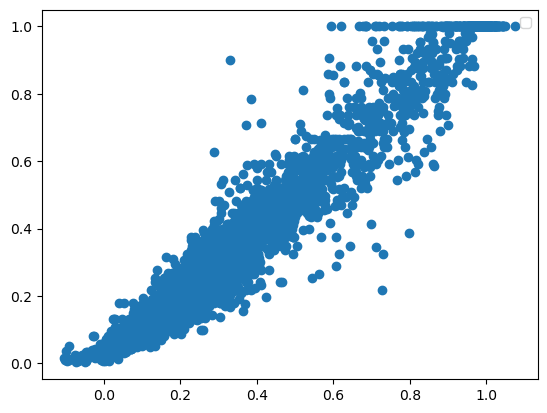

In [43]:
fig = plt.figure()
plt.scatter(y_pred,y_test)
plt.legend()
plt.show()


In [45]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

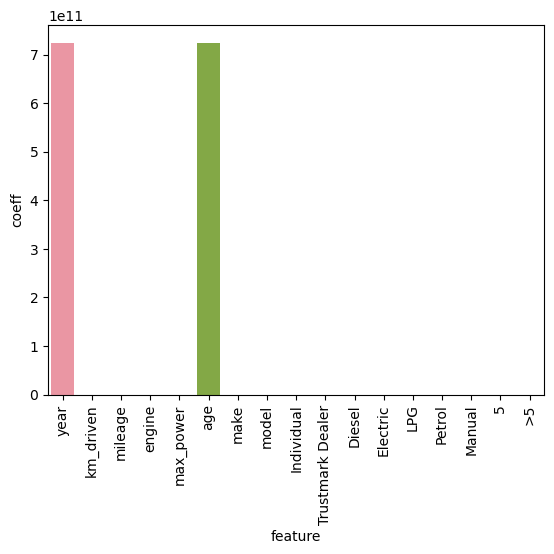

In [47]:
imp = pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),columns = ['feature','coeff'])
sns.barplot(x = 'feature', y = 'coeff',data = imp)
plt.xticks(rotation = 90)

In [ ]:
#zip command is used to pack the diff datatypes together 

In [16]:
#defination R**2  meteric it is measure of how much variants in the data is captured by the regression line

In [18]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df1["make"] = df.groupby("make")["target row"].transform("mean")
scaler = MinMaxScaler()
df1 = pd.DateFrame(scaler.fit_transform(df),columns = df.columns)